In [1]:
import os
os.chdir('C:\\Users\\Swapnonil\\Downloads')

import pandas as pd
att=pd.read_csv('attrition.csv')

import matplotlib.pyplot as plt

In [2]:
att

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,Research & Development,Medical,3,Male,4,2,4,Married,2571,No,17,3,5,2,0,3,23
1466,39,0,Travel_Rarely,Research & Development,Medical,4,Male,2,3,1,Married,9991,No,9,3,7,7,1,7,6
1467,27,0,Travel_Rarely,Research & Development,Life Sciences,2,Male,4,2,2,Married,6142,Yes,6,3,6,2,0,3,4
1468,49,0,Travel_Frequently,Sales,Medical,4,Male,2,2,2,Married,5390,No,17,2,9,6,0,8,2


In [3]:
pd.crosstab(att.Attrition, columns=att.Age)

Age,18,19,20,21,22,23,24,25,26,27,...,51,52,53,54,55,56,57,58,59,60
Attrition,,,,,,,,,,,,,,,,,,,,,
0,4,3,5,7,11,10,19,20,27,45,...,17,15,17,18,19,11,4,9,10,5
1,4,6,6,6,5,4,7,6,12,3,...,2,3,2,0,3,3,0,5,0,0


In [11]:
plot(pd.crosstab(att.Attrition, columns=att.Age))

NameError: name 'plot' is not defined

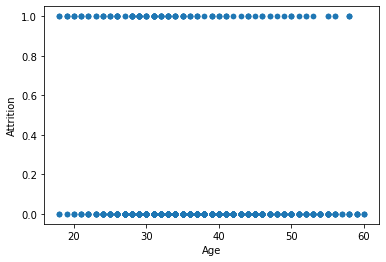

In [10]:
import matplotlib.pyplot as plt
att.plot(kind='scatter', x='Age', y='Attrition')
plt.show()

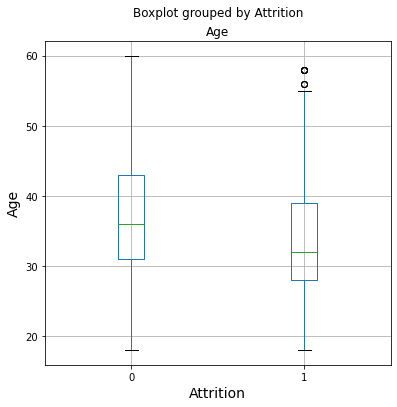

In [34]:
att.boxplot(column='Age', by='Attrition', figsize=(6,6))
plt.xlabel('Attrition', fontsize=14)
plt.ylabel('Age', fontsize=14)
#plt.title('Boxplot of Age grouped by Attrition', fontsize=16)
plt.show()

In [23]:
att[['Age', 'Attrition']].groupby('Attrition').describe()

Age                                                  
            count       mean      std   min   25%   50%   75%   max
Attrition                                                          
0          1233.0  37.561233  8.88836  18.0  31.0  36.0  43.0  60.0
1           237.0  33.607595  9.68935  18.0  28.0  32.0  39.0  58.0

In [6]:
k=(1/(1-0.8))**(0.5)

(37.561233-k*8.88836,37.561233+k*8.88836)
#(33.607595-k*9.68935,33.607595+k*9.68935)

(17.686255831509968, 57.436210168490035)

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Age ~ Attrition', data=att).fit()
aov_table = sm.stats.anova_lm(model, type=2)
print(aov_table)
#By the ANOVA table we can say that for testing H_0:b=0 against H_1:b≠0 where b is the effect of attrition on age
#the p value is 8.356308*10^-10 which is less than 0.05, so we can reject H_0 at 5% level of significance
# and the effects can be estimated

               df         sum_sq      mean_sq          F        PR(>F)
Attrition     1.0    3107.333411  3107.333411  38.175887  8.356308e-10
Residual   1468.0  119488.133255    81.395186        NaN           NaN


In [19]:
att.Age.mean()
print(att.Age[att.Attrition==0].mean()-att.Age.mean())
print(att.Age[att.Attrition==1].mean()-att.Age.mean())

0.6374232418028001
-3.31621458710066


In [11]:
pd.crosstab(att.Attrition, columns=att.Department)/len(att)*100

Department,Human Resources,Research & Development,Sales
Attrition,,,
0,3.469388,56.326531,24.081633
1,0.816327,9.047619,6.258503


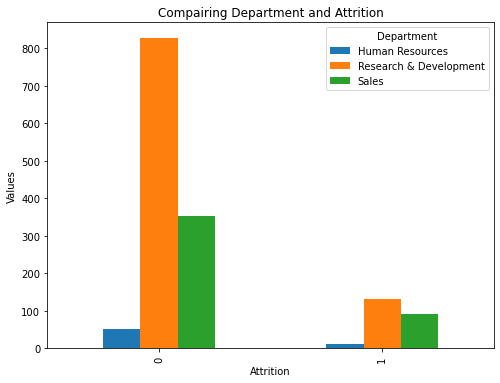

In [31]:
pd.crosstab(att.Attrition, columns=att.Department).plot(kind='bar', figsize=(8,6))
plt.ylabel('Values')
plt.title('Compairing Department and Attrition')
plt.show()

In [5]:
att.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'DistanceFromHome'],
      dtype='object')

In [10]:
pd.crosstab(att.Attrition, columns=att.BusinessTravel)/len(att)*100

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
0,9.387755,14.149660,60.340136
1,0.816327,4.693878,10.612245


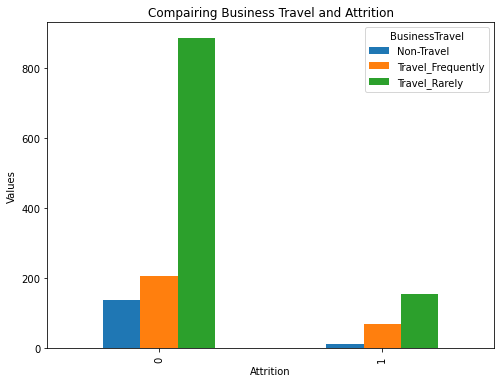

In [9]:
pd.crosstab(att.Attrition, columns=att.BusinessTravel).plot(kind='bar', figsize=(8,6))
plt.ylabel('Values')
plt.title('Compairing Business Travel and Attrition')
plt.show()

EducationField  Human Resources  Life Sciences  Marketing    Medical  \
Attrition                                                              
0                      1.360544      35.170068   8.435374  27.278912   
1                      0.476190       6.054422   2.380952   4.285714   

EducationField     Other  Technical Degree  
Attrition                                   
0               4.829932          6.802721  
1               0.748299          2.176871  


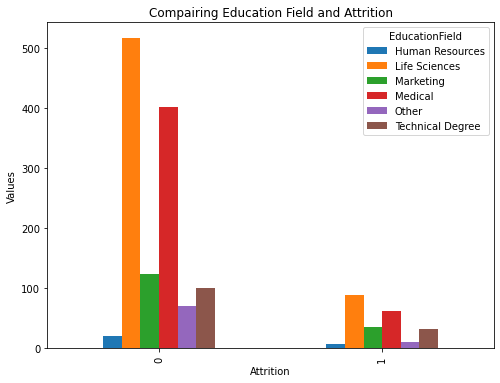

In [9]:
print(pd.crosstab(att.Attrition, columns=att.EducationField)/len(att)*100)

pd.crosstab(att.Attrition, columns=att.EducationField).plot(kind='bar', figsize=(8,6))
plt.ylabel('Values')
plt.title('Compairing Education Field and Attrition')
plt.show()

EnvironmentSatisfaction      1      2      3      4
Attrition                                          
0                        14.42  16.60  26.60  26.26
1                         4.90   2.93   4.22   4.08


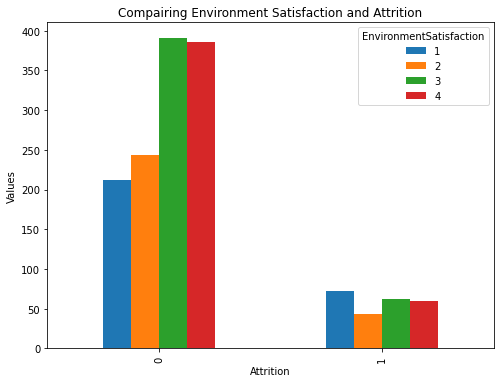

In [8]:
print(round(pd.crosstab(att.Attrition, columns=att.EnvironmentSatisfaction)/len(att)*100, 2))

pd.crosstab(att.Attrition, columns=att.EnvironmentSatisfaction).plot(kind='bar', figsize=(8,6))
plt.ylabel('Values')
plt.title('Compairing Environment Satisfaction and Attrition')
plt.show()

Gender     Female  Male
Attrition              
0           34.08  49.8
1            5.92  10.2


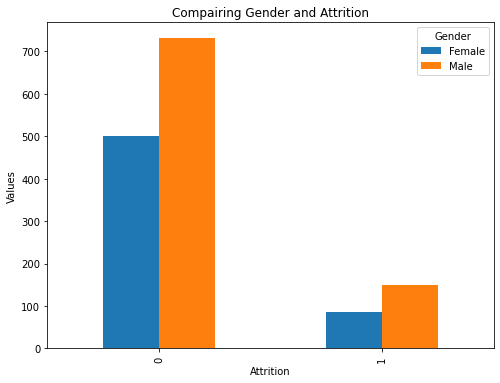

In [36]:
print(round(pd.crosstab(att.Attrition, columns=att.Gender)/len(att)*100, 2))

pd.crosstab(att.Attrition, columns=att.Gender).plot(kind='bar', figsize=(8,6))
plt.ylabel('Values')
plt.title('Compairing Gender and Attrition')
plt.show()

JobInvolvement     1      2      3     4
Attrition                               
0               3.74  20.68  50.54  8.91
1               1.90   4.83   8.50  0.88


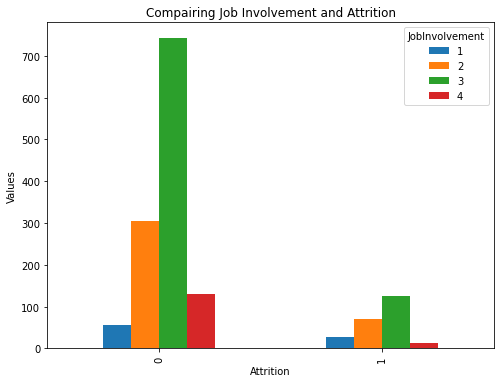

In [5]:
print(round(pd.crosstab(att.Attrition, columns=att.JobInvolvement)/len(att)*100, 2))

pd.crosstab(att.Attrition, columns=att.JobInvolvement).plot(kind='bar', figsize=(8,6))
plt.ylabel('Values')
plt.title('Compairing Job Involvement and Attrition')
plt.show()

MaritalStatus  Divorced  Married  Single
Attrition                               
0                 20.00    40.07   23.81
1                  2.24     5.71    8.16


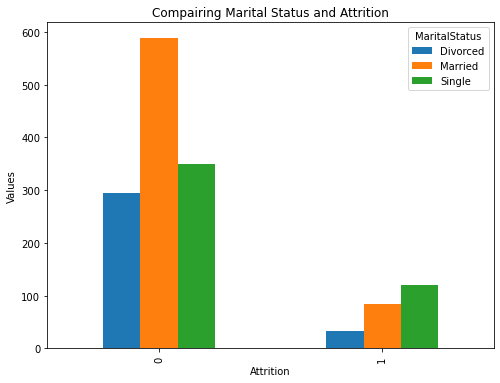

In [4]:
print(round(pd.crosstab(att.Attrition, columns=att.MaritalStatus)/len(att)*100, 2))

pd.crosstab(att.Attrition, columns=att.MaritalStatus).plot(kind='bar', figsize=(8,6))
plt.ylabel('Values')
plt.title('Compairing Marital Status and Attrition')
plt.show()

In [2]:
att[['MonthlyIncome', 'Attrition']].groupby('Attrition').describe()

MonthlyIncome                                                    \
                  count         mean          std     min     25%     50%   
Attrition                                                                   
0                1233.0  6832.739659  4818.208001  1051.0  3211.0  5204.0   
1                 237.0  4787.092827  3640.210367  1009.0  2373.0  3202.0   

                            
              75%      max  
Attrition                   
0          8834.0  19999.0  
1          5916.0  19859.0

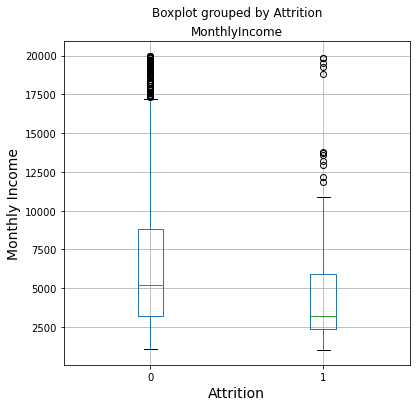

In [3]:
att.boxplot(column='MonthlyIncome', by='Attrition', figsize=(6,6))
plt.xlabel('Attrition', fontsize=14)
plt.ylabel('Monthly Income', fontsize=14)
plt.show()

JobLevel       1      2      3     4     5
Attrition                                 
0          27.21  32.79  12.65  6.87  4.35
1           9.73   3.54   2.18  0.34  0.34


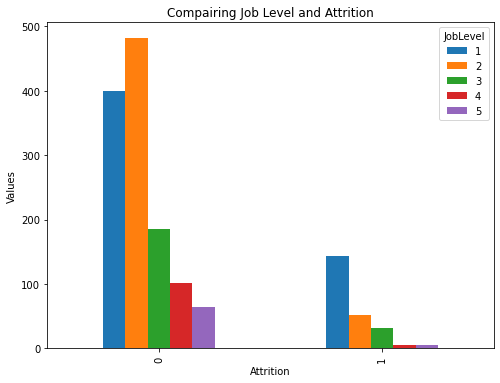

In [4]:
print(round(pd.crosstab(att.Attrition, columns=att.JobLevel)/len(att)*100, 2))

pd.crosstab(att.Attrition, columns=att.JobLevel).plot(kind='bar', figsize=(8,6))
plt.ylabel('Values')
plt.title('Compairing Job Level and Attrition')
plt.show()

JobSatisfaction      1      2      3      4
Attrition                                  
0                15.17  15.92  25.10  27.69
1                 4.49   3.13   4.97   3.54


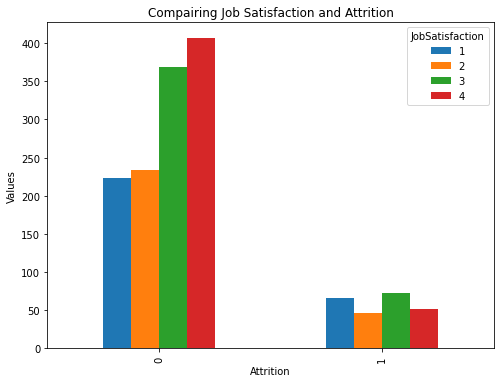

In [7]:
print(round(pd.crosstab(att.Attrition, columns=att.JobSatisfaction)/len(att)*100, 2))

pd.crosstab(att.Attrition, columns=att.JobSatisfaction).plot(kind='bar', figsize=(8,6))
plt.ylabel('Values')
plt.title('Compairing Job Satisfaction and Attrition')
plt.show()